<a href="https://colab.research.google.com/github/FcoFraguas1987/DS_ML_Portfolio/blob/DS_ML_Bioinformatics/Aprendizaje_supervisar_tecnicas_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APRENDIZAJE AUTOMÁTICO REGRESIÓN LINEAR

##DATOS PROBLEMA


###Descripción del dataset
Utilizamos un conjunto de datos conformado por datos clínicos de obesidad infantil obtenidos en pacientes que podrían presentar insulino-resistencia.
Este nuevo conjunto de datos de obesidad contiene información para 16 variables en 292 niños. Dicha información se deriva de una cohorte de niños españoles con edades comprendidas entre 5 a 15 años, agrupados en tres condiciones experimentales (normopeso, sobrepeso y niños con obesidad). Para ellos, hay disponible una amplia gama de datos clínicos, bioquímicos y antropométricos (composición corporal), así como datos de estilo de vida y actividad física (obtenidos mediante acelerómetros).

-----------

###Proceso de estudio
Este conjunto de datos, que incluye tanto datos clínicos como antropométricos, ha demostrado una gran utilidad para predecir una variable de salida de tal relevancia clínica como es el índice de insulino-resistencia (HOMA-IR por sus siglas en Inglés).

A través de la aplicación de técnicas de regresión sobre este conjunto de datos, se podría estudiar la relación entre las variables de antropometría, bioquímica, actividad física y el estado de insulino-resistencia, así como predecir el propio índice de insulinoresistencia HOMA-IR a partir de las anteriores.

El estudio lo vamos a realizar sobre una submuestra, dicha submuestra consta de 292 individuos que a su vez presentan datos de actividad física de calidad suficiente. En los análisis el índice de resistencia a la insulina HOMA-IR se incluirá como variable de salida, constituyendo el output de nuestros modelos de regresión, ya que se ha validado ampliamente como un buen indicador del estado de insulino-resistencia y pre-Diabetes en niños y adultos. Como variables de entrada en el modelo, emplearemos datos clínicos y antropométricos (como el sexo, la edad, el estadío puberal, la altura, la circunferencia de cintura y el Índice de Masa Corporal (IMC)), principales mediciones de actividad física (tales como el número de minutos diarios de inactividad (sedentarismo), o de actividad física leve, moderada y vigorosa). Además, se incluirán indicadores de disfunción cardio-metabólica distintos al propio HOMA-IR (como son los niveles de colesterol HDLc y LDLc, triglicéridos y la presión sanguinea).

-----------------------------

### Software de trabajo

Se realizará todo el análisis con R. En R, los algoritmos permiten realizar una formulación directa sobre el uso de las variables de cualquier conjunto de datos. Ésto permite realizar una construcción por pasos de los modelos, integrando/determinando las variables realmente relevantes y descubriendo el tipo de relación/interacción existente entre las mismas. Igualmente, en R se dispone de más algoritmos y, en nuestro caso, se hace necesario para poder utilizar el algoritmo M5 (vía Cubist) por ser casi un paradigma en el área de la regresión

### Instalando Software y bibliotecas

In [ ]:
### Instalación de R en Google Colab ###
!apt-get update
!apt-get install r-base
!pip install rpy2==3.5.1
%load_ext rpy2.ipython
print ("Instalación de R en Google Colab terminada")

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,069 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,374 kB]
Get:13 https://developer.download.nvidia.com

In [ ]:
# Bibliotecas necesarias: # ISLR para regresión lineal multivariable # kknn para k-vecinos más cercanos de regresión # Cubist para modelos de regresión basados en M5
%%R
### Instalación de las bibliotecas necesarias
install.packages(c("ISLR", "kknn", "Cubist"))
print ("Instalación de las bibliotecas de R para este módulo terminada")

(as ‘lib’ is unspecified)







































	‘/tmp/RtmpaQNR7u/downloaded_packages’



[1] "Instalación de las bibliotecas de R para este módulo terminada"


### Descarga de datos

In [ ]:
%%R
### Lectura
data <- read.csv(url("https://drive.google.com/uc?id=1GO2NBxYw54K6HkN-YgXbNadrLo5O6-0u"))

### Visualización de una pequeña parte de los datos
head(data)

  Sex  Age Tanner Height   BMI   WC TAGmgDL HDLCmgDL LDLCmgDL SBP DBP Sedentary
1   1  9.5      0   1.55 11.34 60.0      55       51       93  97  60  411.0893
2   1  8.0      0   1.15 12.40 46.3      51       70       59  90  55  435.6071
3   0 10.5      0   1.42 12.99 67.5      65       60       96  96  54  483.9048
4   0  8.1      0   1.27 13.43 53.1      41       78      100 108  46  429.2976
5   1 10.4      0   1.32 13.72 51.9      39      100      120 107  69  512.0714
6   0 10.4      0   1.29 14.02 54.9      57       76       73  87  59  451.2321
     Light Moderate  Vigorous HOMA
1 321.5804 22.13393  3.982143 1.98
2 316.9762 48.05952 14.273810 0.87
3 337.7857 33.30952  7.988095 1.46
4 241.9762 39.67857 11.821429 1.07
5 216.0357  9.75000  2.410714 0.80
6 257.6429 36.40179  9.767857 1.35


### Estudio inicial de los datos
Vamos a ver qué variables tienen mayor peso en la variable de salida. Para ello haremos

                  Sex         Age      Tanner      Height         BMI
Sex        1.00000000 -0.10019754  0.04118695 -0.09118517 -0.02053626
Age       -0.10019754  1.00000000  0.66614747  0.87563328  0.32102810
Tanner     0.04118695  0.66614747  1.00000000  0.64893698  0.31632421
Height    -0.09118517  0.87563328  0.64893698  1.00000000  0.44059732
BMI       -0.02053626  0.32102810  0.31632421  0.44059732  1.00000000
WC        -0.04427653  0.46996057  0.36596541  0.59117669  0.91684048
TAGmgDL    0.12336791  0.13532362  0.08712349  0.17413199  0.21096348
HDLCmgDL  -0.11822583 -0.16186251 -0.20391818 -0.27221473 -0.56495703
LDLCmgDL   0.01644653  0.04136751 -0.05779724  0.04465349  0.04270957
SBP       -0.02876843  0.30937916  0.24868064  0.41050794  0.51886413
DBP        0.01170880  0.08901506  0.09810436  0.14492077  0.34105783
Sedentary  0.10609920  0.28684756  0.15336571  0.23437350  0.05011761
Light     -0.09061875 -0.49515226 -0.38901226 -0.43753517 -0.14986528
Moderate  -0.3021688

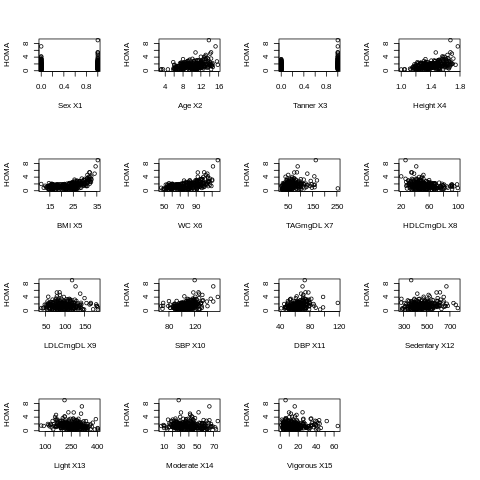

In [ ]:
%%R
### Visualización de las variable respecto a HOMA
temp <- data
plotY <- function (x,y) {
	plot(temp[,y]~temp[,x], xlab=paste(names(temp)[x]," X",x,sep=""), ylab=names(temp)[y])
}
par(mfrow=c(4,4)) #Si margin too large => (5,3)
x <- sapply(1:(dim(temp)[2]-1), plotY, dim(temp)[2])
par(mfrow=c(1,1))

cor(data) # Descomentar si queremos ver los valores concretos de correlación

Los tres parámetros que parecen influir más sobre el HOMA son Heigh, WC y BMI. Por lo que se seguirá el proceso con estos datos. Analizando su correlación mediante una gráfica.


Call:
lm(formula = HOMA ~ BMI, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6176 -0.5495 -0.0203  0.5005  5.8905 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.987863   0.216053  -4.572 7.15e-06 ***
BMI          0.115430   0.009277  12.442  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8538 on 290 degrees of freedom
Multiple R-squared:  0.348,	Adjusted R-squared:  0.3458 
F-statistic: 154.8 on 1 and 290 DF,  p-value: < 2.2e-16



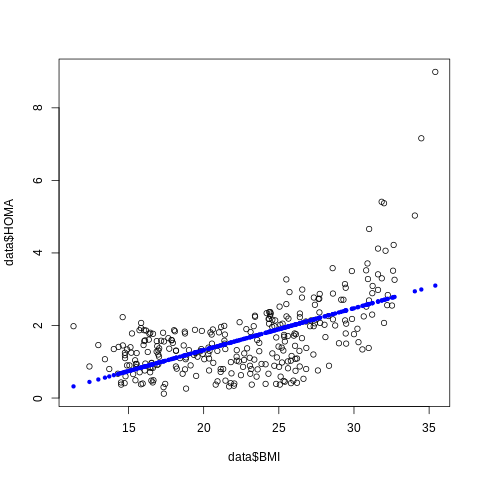

In [ ]:
%%R
### Obteción del modelo. Función lm() del paquete ISLR.
### Y=HOMA, X's=BMI (índice de masa corporal) -> formula: HOMA ~ BMI
fitLM <- lm(HOMA ~ BMI, data=data)

### Visualización de la línea (azul, valores estimados) vs valores reales (negro, valores observados).
yprime = predict(fitLM,data)
plot(data$HOMA~data$BMI)
points(data$BMI,yprime,col="blue",pch=20)

### Coeficientes (Estimate), p-valores (Pr(>|t|)), R2 ajustado (Adjusted R-squared),
### estadístico F y p-valor (F-statistic y p-value)
summary(fitLM)


Call:
lm(formula = HOMA ~ Height, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8080 -0.6062 -0.1728  0.4393  6.4400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.4639     0.5467  -6.336    9e-10 ***
Height        3.6012     0.3848   9.359   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9267 on 290 degrees of freedom
Multiple R-squared:  0.232,	Adjusted R-squared:  0.2293 
F-statistic: 87.58 on 1 and 290 DF,  p-value: < 2.2e-16



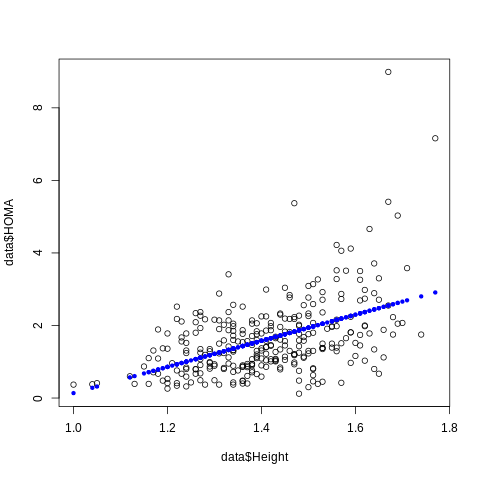

In [ ]:
%%R
### Idem para la variable Height (altura)
fitLM <- lm(HOMA ~ Height, data=data)
yprime = predict(fitLM,data)
plot(data$HOMA~data$Height)
points(data$Height,yprime,col="blue",pch=20)
summary(fitLM)


Call:
lm(formula = HOMA ~ WC, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6840 -0.5542 -0.0354  0.4949  5.9256 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.175876   0.260223  -4.519 9.07e-06 ***
WC           0.036241   0.003296  10.995  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8883 on 290 degrees of freedom
Multiple R-squared:  0.2942,	Adjusted R-squared:  0.2918 
F-statistic: 120.9 on 1 and 290 DF,  p-value: < 2.2e-16



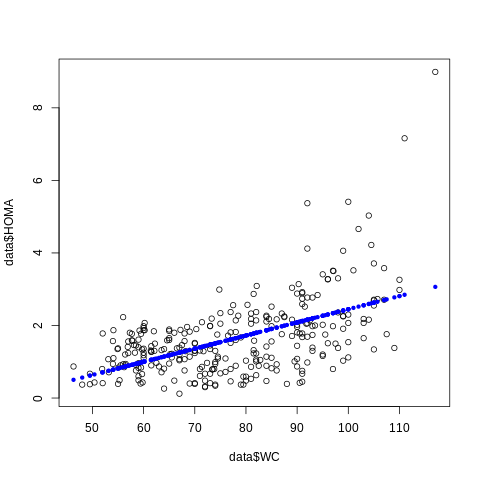

In [ ]:
%%R
### Idem para la variable WC (circunferencia de la cintura)
fitLM <- lm(HOMA ~ WC, data=data)
yprime = predict(fitLM,data)
plot(data$HOMA~data$WC)
points(data$WC,yprime,col="blue",pch=20)
summary(fitLM)

Tras estas gráficas se aprecia cierta relación lineal entre las tres variables independientes y la dependiente. Todos los estadísiticos resultan estadísticvamente significativo, pero el valor de R^2 es demasiado bajo en el mejor de los casos (~0,35 para el Índice de masa Corporal).

##SELECCIÓN ADITIVA DE VARIABLES: ENFOQUE DESCENDENTE

In [ ]:
%%R
### Obteción del modelo. Y=HOMA, X's=Todas -> formula: HOMA ~ .
fitLM <- lm(HOMA ~ ., data=data)

### Recordatorio:
### Coeficientes (Estimate), p-valores (Pr(>|t|)), R2 ajustado (Adjusted R-squared),
### estadístico F y p-valor (F-statistic y p-value)
summary(fitLM)


Call:
lm(formula = HOMA ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4294 -0.4619 -0.0636  0.4089  5.1679 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.9193063  0.9463797  -6.255 1.51e-09 ***
Sex          0.3046482  0.0961801   3.167  0.00171 ** 
Age          0.0056148  0.0431482   0.130  0.89656    
Tanner       0.1345579  0.1352788   0.995  0.32077    
Height       2.4505541  0.7621021   3.216  0.00146 ** 
BMI          0.1455896  0.0228539   6.370 7.86e-10 ***
WC          -0.0247314  0.0086550  -2.857  0.00460 ** 
TAGmgDL      0.0072443  0.0016646   4.352 1.90e-05 ***
HDLCmgDL     0.0082428  0.0040629   2.029  0.04344 *  
LDLCmgDL    -0.0031440  0.0017745  -1.772  0.07753 .  
SBP          0.0041084  0.0043852   0.937  0.34964    
DBP          0.0086374  0.0054648   1.581  0.11513    
Sedentary    0.0010000  0.0005885   1.699  0.09038 .  
Light        0.0013119  0.0010782   1.217  0.22473    
Moderate     0.0038260 

In [ ]:
# Estadísitco de F está bien, alejado de 1 y el p-valor del algoritmo es
# significativo. Eliminamos la variable Age por ser la que mayor p-valor tiene.

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4365 -0.4646 -0.0683  0.4115  5.1690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.9584990  0.8955812  -6.653 1.53e-10 ***
Sex          0.3034817  0.0955914   3.175  0.00167 ** 
Tanner       0.1396497  0.1292663   1.080  0.28094    
Height       2.5180619  0.5572805   4.518 9.23e-06 ***
BMI          0.1452026  0.0226194   6.419 5.92e-10 ***
WC          -0.0245827  0.0085641  -2.870  0.00441 ** 
TAGmgDL      0.0072474  0.0016615   4.362 1.82e-05 ***
HDLCmgDL     0.0083213  0.0040108   2.075  0.03894 *  
LDLCmgDL    -0.0031315  0.0017687  -1.771  0.07774 .  
SBP          0.0040640  0.0043641   0.931  0.35255    
DBP          0.0086128  0.0054518   1.580  0.11529    
Sedentary    0.0010094  0.0005831   1.731  0.08455 .  
Light        0.0012833  0.0010537   1.218  0.22431    
Moderate     0.0038748  0.0047594   0.814  0.41627    
Vigorous    -0.00

In [ ]:
# Estadísitco de F está bien, alejado de 1, más que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable Moderate por ser la que mayor p-valor tiene.

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age y Moderate -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3679 -0.4614 -0.0789  0.4085  5.1735 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.8816129  0.8900476  -6.608 1.98e-10 ***
Sex          0.2850872  0.0928265   3.071  0.00234 ** 
Tanner       0.1457291  0.1289721   1.130  0.25948    
Height       2.5165450  0.5569393   4.519 9.22e-06 ***
BMI          0.1475379  0.0224231   6.580 2.34e-10 ***
WC          -0.0252296  0.0085219  -2.961  0.00334 ** 
TAGmgDL      0.0072720  0.0016602   4.380 1.68e-05 ***
HDLCmgDL     0.0084659  0.0040044   2.114  0.03539 *  
LDLCmgDL    -0.0032874  0.0017572  -1.871  0.06243 .  
SBP          0.0041578  0.0043599   0.954  0.34109    
DBP          0.0079398  0.0053855   1.474  0.14154    
Sedentary    0.0009849  0.0005820   1.692  0.09168 .  
Light        0.0016399  0.0009578   1.712  0.08799 .  
Vigorous    -0.0031646  0.0047472  -0.667  0.50556    
---
Si

In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable Vigorous por ser la que mayor p-valor tiene.

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3842 -0.4532 -0.0697  0.4140  5.2047 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.9128139  0.8879307  -6.659 1.46e-10 ***
Sex          0.2925415  0.0920587   3.178  0.00165 ** 
Tanner       0.1384949  0.1283868   1.079  0.28164    
Height       2.4410812  0.5447701   4.481 1.09e-05 ***
BMI          0.1475844  0.0224007   6.588 2.21e-10 ***
WC          -0.0251966  0.0085133  -2.960  0.00334 ** 
TAGmgDL      0.0074318  0.0016411   4.528 8.81e-06 ***
HDLCmgDL     0.0084705  0.0040004   2.117  0.03511 *  
LDLCmgDL    -0.0033090  0.0017552  -1.885  0.06043 .  
SBP          0.0045736  0.0043108   1.061  0.28963    
DBP          0.0080719  0.0053765   1.501  0.13441    
Sedentary    0.0010540  0.0005721   1.842  0.06648 .  
Light        0.0016076  0.0009556   1.682  0.09364 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable SBP por ser la que mayor p-valor tiene.

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous -SBP, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous - SBP, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3819 -0.4721 -0.0741  0.4147  5.1864 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.8418812  0.8856086  -6.596 2.10e-10 ***
Sex          0.2946858  0.0920572   3.201  0.00153 ** 
Tanner       0.1348695  0.1283701   1.051  0.29433    
Height       2.5360033  0.5374936   4.718 3.76e-06 ***
BMI          0.1507284  0.0222088   6.787 6.83e-11 ***
WC          -0.0246333  0.0084987  -2.898  0.00405 ** 
TAGmgDL      0.0073419  0.0016393   4.479 1.10e-05 ***
HDLCmgDL     0.0089568  0.0039750   2.253  0.02501 *  
LDLCmgDL    -0.0032133  0.0017532  -1.833  0.06790 .  
DBP          0.0098000  0.0051250   1.912  0.05687 .  
Sedentary    0.0010986  0.0005707   1.925  0.05524 .  
Light        0.0016537  0.0009549   1.732  0.08441 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7532

In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable Tanner por ser la que mayor p-valor tiene.

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous -SBP -Tanner, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous - SBP - Tanner, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3378 -0.4499 -0.0555  0.4155  5.1964 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.1219408  0.8446953  -7.248 4.11e-12 ***
Sex          0.3059397  0.0914488   3.345 0.000933 ***
Height       2.8435807  0.4508536   6.307 1.10e-09 ***
BMI          0.1545041  0.0219201   7.048 1.40e-11 ***
WC          -0.0260849  0.0083872  -3.110 0.002062 ** 
TAGmgDL      0.0072820  0.0016386   4.444 1.27e-05 ***
HDLCmgDL     0.0088032  0.0039730   2.216 0.027510 *  
LDLCmgDL    -0.0033950  0.0017450  -1.946 0.052708 .  
DBP          0.0097975  0.0051260   1.911 0.056978 .  
Sedentary    0.0010554  0.0005693   1.854 0.064806 .  
Light        0.0014998  0.0009438   1.589 0.113141    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7534 on 281 degrees of freedom
Multiple R-squ

In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable Light por ser la que mayor p-valor tiene.

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous -SBP -Tanner -Light, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous - SBP - Tanner - 
    Light, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3263 -0.4550 -0.0538  0.3980  5.1652 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.2896377  0.6645271  -7.960 4.23e-14 ***
Sex          0.2914895  0.0912414   3.195  0.00156 ** 
Height       2.6091544  0.4271894   6.108 3.34e-09 ***
BMI          0.1554630  0.0219710   7.076 1.18e-11 ***
WC          -0.0259753  0.0084095  -3.089  0.00221 ** 
TAGmgDL      0.0072796  0.0016430   4.431 1.35e-05 ***
HDLCmgDL     0.0090872  0.0039797   2.283  0.02315 *  
LDLCmgDL    -0.0033464  0.0017495  -1.913  0.05678 .  
DBP          0.0093735  0.0051328   1.826  0.06888 .  
Sedentary    0.0007619  0.0005400   1.411  0.15936    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7554 on 282 degrees of freedom
Multiple R-squared:  0.5037,	Adjusted R-squared:  0.4879 
F-s

In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable Sedentary por ser la que mayor p-valor tiene.

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous -SBP -Tanner -Light -Sedentary, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous - SBP - Tanner - 
    Light - Sedentary, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4022 -0.4525 -0.0408  0.3880  5.0570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.133154   0.656353  -7.821 1.05e-13 ***
Sex          0.307461   0.090695   3.390 0.000798 ***
Height       2.764817   0.413419   6.688 1.21e-10 ***
BMI          0.156909   0.021985   7.137 8.04e-12 ***
WC          -0.027091   0.008387  -3.230 0.001383 ** 
TAGmgDL      0.007288   0.001646   4.428 1.36e-05 ***
HDLCmgDL     0.008966   0.003986   2.250 0.025241 *  
LDLCmgDL    -0.003229   0.001751  -1.844 0.066178 .  
DBP          0.009670   0.005138   1.882 0.060843 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7567 on 283 degrees of freedom
Multiple R-squared:  0.5002,	Adjusted R-squared:  0.4861 
F-statistic:  35.4 on 8 and 283 DF,  p-value: < 2.2e-16


In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable HDLCmgDL por ser la que mayor p-valor tiene.
#Aqui hay un ligero decrecimiento del R^2

%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous -SBP -Tanner -Light -Sedentary -HDLCmgDL, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous - SBP - Tanner - 
    Light - Sedentary - HDLCmgDL, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3940 -0.4603 -0.0394  0.4411  5.1080 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.343832   0.558651  -7.776 1.39e-13 ***
Sex          0.280712   0.090553   3.100 0.002130 ** 
Height       2.829604   0.415353   6.813 5.73e-11 ***
BMI          0.151379   0.022003   6.880 3.82e-11 ***
WC          -0.030081   0.008340  -3.607 0.000366 ***
TAGmgDL      0.006239   0.001590   3.925 0.000109 ***
LDLCmgDL    -0.003301   0.001763  -1.873 0.062161 .  
DBP          0.010292   0.005167   1.992 0.047329 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7621 on 284 degrees of freedom
Multiple R-squared:  0.4913,	Adjusted R-squared:  0.4787 
F-statistic: 39.18 on 7 and 284 DF,  p-value: < 2.2e-16



In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable LDLCmgDL por ser la que mayor p-valor tiene.
#Aqui R^2 decrece un poquito más
%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous -SBP -Tanner -Light -Sedentary -HDLCmgDL -LDLCmgDL, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous - SBP - Tanner - 
    Light - Sedentary - HDLCmgDL - LDLCmgDL, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3242 -0.4472 -0.0348  0.4276  5.1188 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.596262   0.544521  -8.441 1.62e-15 ***
Sex          0.283943   0.090933   3.123 0.001977 ** 
Height       2.846125   0.417081   6.824 5.32e-11 ***
BMI          0.153724   0.022064   6.967 2.24e-11 ***
WC          -0.030779   0.008368  -3.678 0.000281 ***
TAGmgDL      0.005438   0.001538   3.536 0.000473 ***
DBP          0.009615   0.005177   1.857 0.064295 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7655 on 285 degrees of freedom
Multiple R-squared:  0.485,	Adjusted R-squared:  0.4741 
F-statistic: 44.73 on 6 and 285 DF,  p-value: < 2.2e-16



In [ ]:
# Estadísitco de F está bien, más alejado de 1 que antes y el p-valor del algoritmo es
# significativo. Eliminamos la variable DBP por ser la que mayor p-valor tiene.
#Aqui R^2 decrece un poquito más
%%R
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age -Moderate -Vigorous -SBP -Tanner -Light -Sedentary -HDLCmgDL -LDLCmgDL -DBP, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate - Vigorous - SBP - Tanner - 
    Light - Sedentary - HDLCmgDL - LDLCmgDL - DBP, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3927 -0.4579 -0.0644  0.4469  5.1205 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.095541   0.475122  -8.620 4.65e-16 ***
Sex          0.286521   0.091311   3.138 0.001880 ** 
Height       2.823915   0.418692   6.745 8.49e-11 ***
BMI          0.157742   0.022052   7.153 7.12e-12 ***
WC          -0.030130   0.008397  -3.588 0.000391 ***
TAGmgDL      0.005535   0.001544   3.586 0.000395 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7687 on 286 degrees of freedom
Multiple R-squared:  0.4787,	Adjusted R-squared:  0.4696 
F-statistic: 52.54 on 5 and 286 DF,  p-value: < 2.2e-16



--------------------------

In [ ]:
### Paramos y reformulamos por legibilidad indicando las variables de entrada seleccionadas de manera aditiva
### Este modelo es equivalente al inmediatamente anterior pero muestra con claridad lo seleccionado
%%R

fitLM <- lm(HOMA ~ +BMI +Height +TAGmgDL +Sex +WC +LDLCmgDL +HDLCmgDL +DBP, data=data) #Vea que ya no se incluye el punto
summary(fitLM)


Call:
lm(formula = HOMA ~ +BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4022 -0.4525 -0.0408  0.3880  5.0570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.133154   0.656353  -7.821 1.05e-13 ***
BMI          0.156909   0.021985   7.137 8.04e-12 ***
Height       2.764817   0.413419   6.688 1.21e-10 ***
TAGmgDL      0.007288   0.001646   4.428 1.36e-05 ***
Sex          0.307461   0.090695   3.390 0.000798 ***
WC          -0.027091   0.008387  -3.230 0.001383 ** 
LDLCmgDL    -0.003229   0.001751  -1.844 0.066178 .  
HDLCmgDL     0.008966   0.003986   2.250 0.025241 *  
DBP          0.009670   0.005138   1.882 0.060843 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7567 on 283 degrees of freedom
Multiple R-squared:  0.5002,	Adjusted R-squared:  0.4861 
F-statistic:  35.4 on 8 and 283 DF,  p-value: < 2.2e-16



## Interacciones y No-linealidad

Se aprecia, por los datos anteriores, que el problema tiene una parte lineal y otra no lineal. Por ello vamos a centrarnos ahora en la parte no lineal.

Además de esto vamos a determinar sinergias. Las sinergias pueden ser evidentes si ya se tiene conocimientos o experiencia sobre el tema.

Iniciamos la exploración no lineal utilizando los parámetros de Altura y WC.

In [ ]:
%%R
### Interacciones entre triglicéridos y colesteroles
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP+TAGmgDL*HDLCmgDL*LDLCmgDL, data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP + TAGmgDL * HDLCmgDL * LDLCmgDL, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5603 -0.4625 -0.0600  0.3862  4.9757 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -4.756e+00  1.512e+00  -3.144 0.001844 ** 
BMI                        1.580e-01  2.221e-02   7.113 9.59e-12 ***
Height                     2.799e+00  4.170e-01   6.712 1.07e-10 ***
TAGmgDL                    1.097e-02  1.748e-02   0.627 0.531002    
Sex                        3.130e-01  9.187e-02   3.408 0.000752 ***
WC                        -2.775e-02  8.486e-03  -3.270 0.001209 ** 
LDLCmgDL                  -9.731e-03  1.388e-02  -0.701 0.483962    
HDLCmgDL                   1.049e-03  2.518e-02   0.042 0.966806    
DBP                        9.692e-03  5.168e-03   1.876 0.061766 .  
TAGmgDL:HDLCmgDL          -7.809e-05  3.563e-04  -0.219 0.826

Ahora probaremos con otro término no lienal, bsándonos en las gráficas de estudio de las variables vs los niveles de HOMA se ve que el BMI sigue un distribución exponencial.

In [ ]:
%%R
### Interacciones entre altura y la circunferencia de la cintura, más BMI^2
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP+Height*WC+I(BMI^2), data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP + Height * WC + I(BMI^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9267 -0.3865  0.0019  0.3615  3.4774 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.308654   1.964056   2.194  0.02907 *  
BMI         -0.443050   0.077356  -5.727 2.62e-08 ***
Height       0.682096   1.490290   0.458  0.64753    
TAGmgDL      0.006089   0.001439   4.232 3.14e-05 ***
Sex          0.237497   0.079227   2.998  0.00296 ** 
WC          -0.041319   0.029621  -1.395  0.16414    
LDLCmgDL    -0.002949   0.001523  -1.936  0.05383 .  
HDLCmgDL     0.005186   0.003491   1.486  0.13852    
DBP          0.005995   0.004505   1.331  0.18434    
I(BMI^2)     0.012615   0.001569   8.042 2.48e-14 ***
Height:WC    0.016942   0.019224   0.881  0.37890    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.658 on 281 degr

Los resultados arrojados por este modelo se ajustan mejor a los valores del *training set*. De hecho, este modelo dice que el parámetro Altura*WC deja de ser significativo. Está claro que BMI^2 explica mejor el problema que las variables que vamos a quitar.

In [ ]:
%%R
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP+I(BMI^2), data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP + I(BMI^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8747 -0.3846 -0.0021  0.3674  3.5269 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.821314   1.004299   2.809  0.00531 ** 
BMI         -0.474890   0.068374  -6.945 2.61e-11 ***
Height       1.954571   0.369059   5.296 2.39e-07 ***
TAGmgDL      0.006028   0.001437   4.196 3.64e-05 ***
Sex          0.240162   0.079138   3.035  0.00263 ** 
WC          -0.016037   0.007380  -2.173  0.03060 *  
LDLCmgDL    -0.002912   0.001522  -1.914  0.05666 .  
HDLCmgDL     0.005082   0.003488   1.457  0.14619    
DBP          0.005638   0.004485   1.257  0.20978    
I(BMI^2)     0.013273   0.001379   9.624  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6577 on 282 degrees of freedom
Multiple R-squared:  0.6238,	Adjusted R-squared:  0.

Y ahora deja de ser significativo la variable DBP.

In [ ]:
%%R
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+I(BMI^2), data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + I(BMI^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9051 -0.3843 -0.0047  0.3459  3.5083 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.176416   0.964737   3.293  0.00112 ** 
BMI         -0.480043   0.068321  -7.026 1.58e-11 ***
Height       1.930855   0.368954   5.233 3.25e-07 ***
TAGmgDL      0.006063   0.001438   4.217 3.33e-05 ***
Sex          0.241655   0.079210   3.051  0.00250 ** 
WC          -0.015478   0.007374  -2.099  0.03669 *  
LDLCmgDL    -0.002774   0.001519  -1.826  0.06898 .  
HDLCmgDL     0.005268   0.003488   1.510  0.13208    
I(BMI^2)     0.013435   0.001375   9.774  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6584 on 283 degrees of freedom
Multiple R-squared:  0.6217,	Adjusted R-squared:  0.611 
F-statistic: 58.13 on 8 and 283 DF,  p-value: < 2.2e-16

Por último retiramos el HDL.

In [ ]:
%%R
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+I(BMI^2), data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    I(BMI^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8923 -0.3932  0.0004  0.3582  3.5091 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.797671   0.874612   4.342 1.97e-05 ***
BMI         -0.495014   0.067751  -7.306 2.79e-12 ***
Height       1.952522   0.369506   5.284 2.52e-07 ***
TAGmgDL      0.005433   0.001379   3.940 0.000103 ***
Sex          0.224973   0.078613   2.862 0.004526 ** 
WC          -0.016985   0.007322  -2.320 0.021069 *  
LDLCmgDL    -0.002803   0.001523  -1.841 0.066719 .  
I(BMI^2)     0.013684   0.001368  10.006  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6599 on 284 degrees of freedom
Multiple R-squared:  0.6186,	Adjusted R-squared:  0.6092 
F-statistic: 65.81 on 7 and 284 DF,  p-value: < 2.2e-16



Con esto pare que el modelo explica el poroblema. Para cercionarnos vamos a visualizarlo.

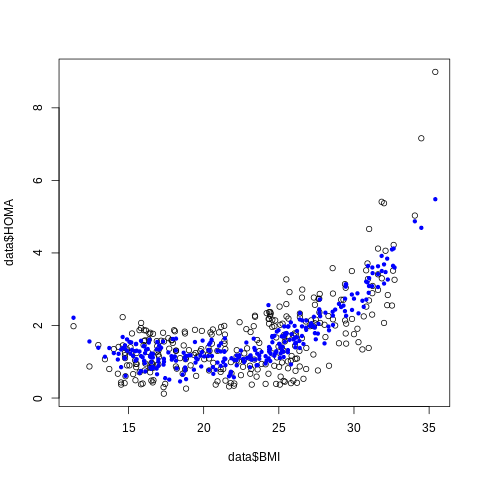

In [ ]:
%%R

yprime = predict(fitLM,data) #predecimos los valores utilizando el modelo


plot(data$HOMA~data$BMI) #pintamos los valores de las muestras
points(data$BMI,yprime,col="blue",pch=20) #pintamos en azul los valores predichos

El modelo obtenido es adecuado. Se ve que el modelo tiene un R^2 de 0,6092 casi el doble que el modelo inicial. Además el stadístico de F lo hace significativo y todas las variables incluidas en el mismo tiene un p-valor inferior a 0.1, lo que las hace relevantes para el mismo y significativamente estadística la participación en la predicción.

## Validación cruzada

Ahora buscamos poder utilizar la validación cruzada con la fórmula determinada como la más óptima para el modelo. Con la validación cruzada obtendremos parámetros estadísiticos que nos determinen estadísitcamnete mejor la calidad del modelo.

In [ ]:
%%R
set.seed(123456)
k <- 5
data$kfold <- sample(1:k, nrow(data), replace = T)

performances <- c()

# One iteration per fold
for (fold in 1:k){
  # Se crea el conjunto de entrenamiento para la iteración
  training_set <- data[data$kfold != fold,]
  nombres <- names(training_set)
  tam <- length(nombres)-1
  training_set <- training_set[,nombres[1: tam]]

  # Create test set for this iteration
  # Subset all the datapoints where .folds matches the current fold
  testing_set <- data[data$kfold == fold,]
  nombres <- names(testing_set)
  tam <- length(nombres)-1
  testing_set <- testing_set[,nombres[1: tam]]

  ## Entrenando el modelo para la iteración
  model <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+I(BMI^2), data=training_set)

  ## Calculando el error de test
  yprime <- predict(model, testing_set)
  RMSE <- sqrt(sum((testing_set$HOMA-yprime)^2)/length(yprime))

  # Add the RMSE to the performance list
  performances[fold] <- RMSE
}

#Eliminamos la columna artificial añadida para kfold
#(para que no acumule columnas si se ejecuta varias veces)
nombres <- names(data)
tam <- length(nombres)-1
data <- data[,nombres[1: tam]]

print (performances)

cat("RECM medio en test para 5-fcv:", mean(performances), "y su varianza: ", var(performances))

[1] 0.5990611 0.5756943 0.7734048 0.7768844 0.7529857
RECM medio en test para 5-fcv: 0.6956061 y su varianza:  0.009912745